# Axis Insurance: Statistical Analysis of Business Data

OBJECTIVE:

1. Perform EDA to learn and investigate the sample data and discover it's story.
2. Through statistical analysis, determine if there is a greater number of medical claims made by individuals who smoke as opposed to those that do not smoke.
3. Through statistical analysis, determine if there is a difference in the BMI of females versus males.
4. Determine if there is a difference in the proportions of smokers across different regions.
5. Determine if the mean BMI of women with no children, one child, and two children are the same.

DATA DICTIONARY:

1. Age: represents the age of the primary beneficiary under the age of 64 (over 64 are assumed to be covered by the government) in an integer format
2. Sex: gender of policiy holder, either male or female
3. BMI: stands for body mass index and is used as an indicator of fitness, or how under/over weight an individual is relative to their height. BMI is calculated by dividing weight (in kg) by height (in meters) squared. Ideal BMI is within a range of 18.5 to 24.9
4. Children: represents the number of children/dependents covered by the insurance policy in an integer format
5. Smoker: indicator of the policy holder identifying themselves as a smoker in a yes/no format
6. Region: this is the beneficiary's area of domicile based on dividing the US into four geographic areas: northeast, southeast, southwest, or the northwest
7. Charges: the medical fees charged to health insurance

## Import necessary libraries

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
sns.set(color_codes=True)
%matplotlib inline 
from scipy.stats import ttest_1samp, wilcoxon
from statsmodels.stats.power import ttest_power
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

## Import the data set and view the first five rows

In [3]:
axis  = pd.read_csv('AxisInsurance.csv') 
axis.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## View last five rows

In [8]:
axis.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


OBSERVATIONS:
1. Sex, smoker and region are all categorical.
2. Remaining data is numerical.
3. Charges are in dollars and age is in years.

## Understand the shape of the data

In [3]:
axis.shape

(1338, 7)

The data set contains 1,338 rows and 7 columns.

## Check the data types

In [4]:
axis.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


OBSERVATIONS:

1. Sex, smoker and region are all objects and need to be converted to categorical.
2. The remaining data are either in an integer or float format.

In [9]:
axis["sex"]=axis["sex"].astype("category")
axis["smoker"]=axis["smoker"].astype("category")
axis["region"]=axis["region"].astype("category")

## Check the conversion to categorical data 

In [11]:
axis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


Sex, smoker and region were successfully converted to categories. 
This also decreases our memory usage from 73.3+ KB to 46.2 KB.

## Perform statistical summary for the data 

In [12]:
axis.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


OBSERVATIONS:

1. The mean of age, bmi and children are similiar to the median.
2. The mean of charges is greater than that of the median which suggests right skewed data.

In [13]:
axis.describe(include=["category"])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


OBSERVATIONS:

1. Sex column has 2 options with male (676) being the most frequent over females (662).
2. Smoker column has 2 options with "no" being the most frequent over "yes" (274). 
3. Region has 4 options with southeast (364) being the most frequent. 

## Check for missing values 

In [5]:
axis.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values within the data set.

# EDA

## Univariate analysis

## Categorical data: 

In [14]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) 
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() / 2 - 0.05 
        y = p.get_y() + p.get_height()           
        ax.annotate(percentage, (x, y), size = 12) 

## Observations on sex:  

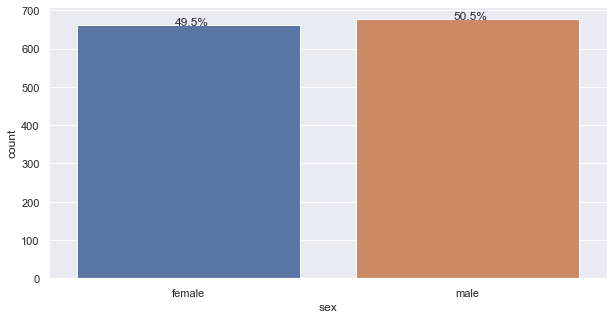

In [15]:
plt.figure(figsize=(10,5))
ax = sns.countplot(axis['sex'])
plt.xlabel('sex')
plt.ylabel('count')
bar_perc(ax,axis['sex']) 

OBSERVATIONS:

1. There is only a 1% difference between the count of males and females.

## Observations on smoker: 

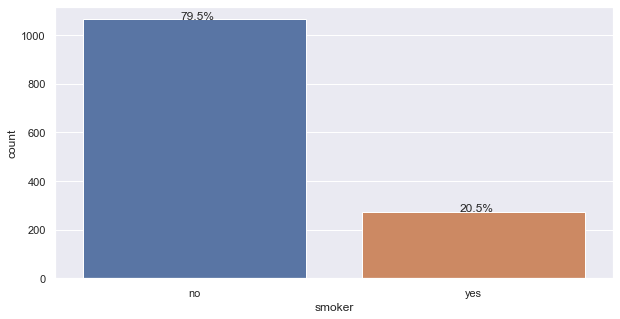

In [16]:
plt.figure(figsize=(10,5))
ax = sns.countplot(axis['smoker'])
plt.xlabel('smoker')
plt.ylabel('count')
bar_perc(ax,axis['smoker']) 

OBSERVATIONS:

1. 79.5% of clients do not smoke.

## Observations on region:

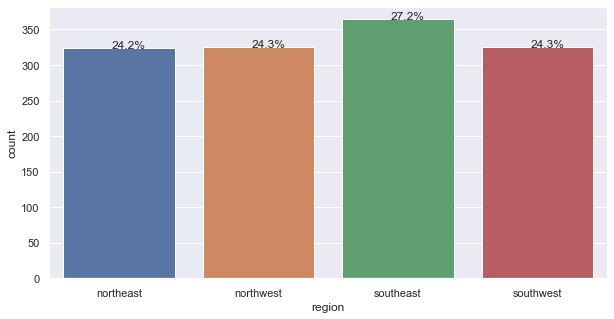

In [17]:
plt.figure(figsize=(10,5))
ax = sns.countplot(axis['region'])
plt.xlabel('region')
plt.ylabel('count')
bar_perc(ax,axis['region']) 

OBSERVATIONS:

1. 27.2% of clients live in the southeast.
2. 24.3% of clients live in both the northwest and southwest.
3. 24.2% of clients live in the northeast.

## Numerical data:

In [18]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

## Observations on age: 

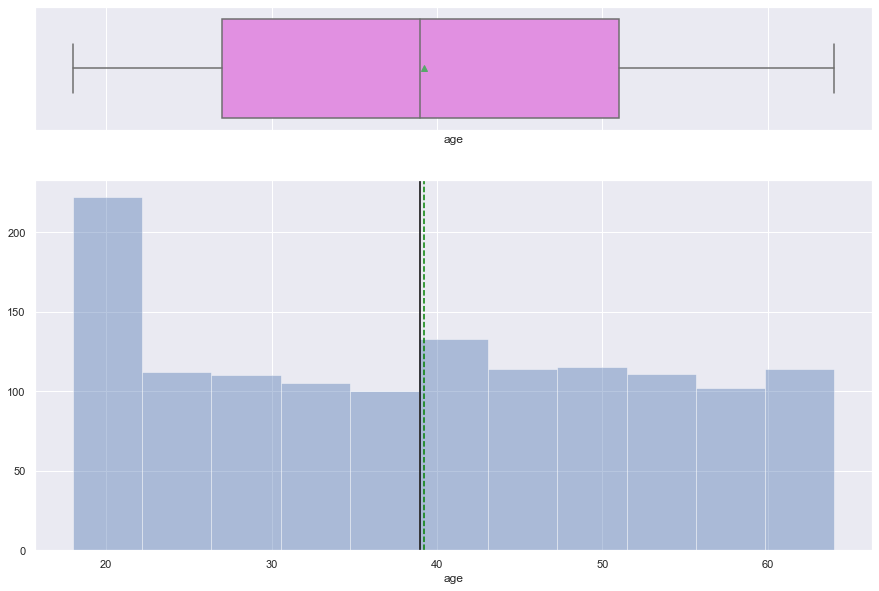

In [19]:
histogram_boxplot(axis["age"])

OBSERVATIONS:

1. The data appears to be symmetrically distributed since the mean and median are almost equal. However, there is a peak on the left around the 20 year old age bracket which could indicate slightly positive/right skewed data.
2. The average age of the clients is approximately 39 years old.

## Observations on BMI: 

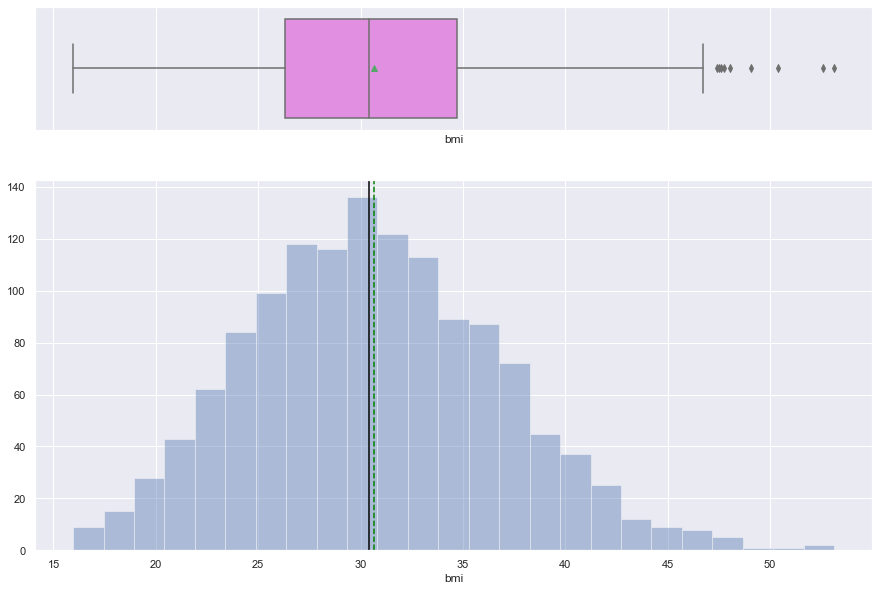

In [24]:
histogram_boxplot(axis['bmi'])

OBSERVATIONS:

1. The data appears to be symmetrically distributed since the mean and median are almost equal.
2. The average BMI of clients is 31. Ideal BMI is between 18.5 and 24.9. 

## Observations on number of children: 

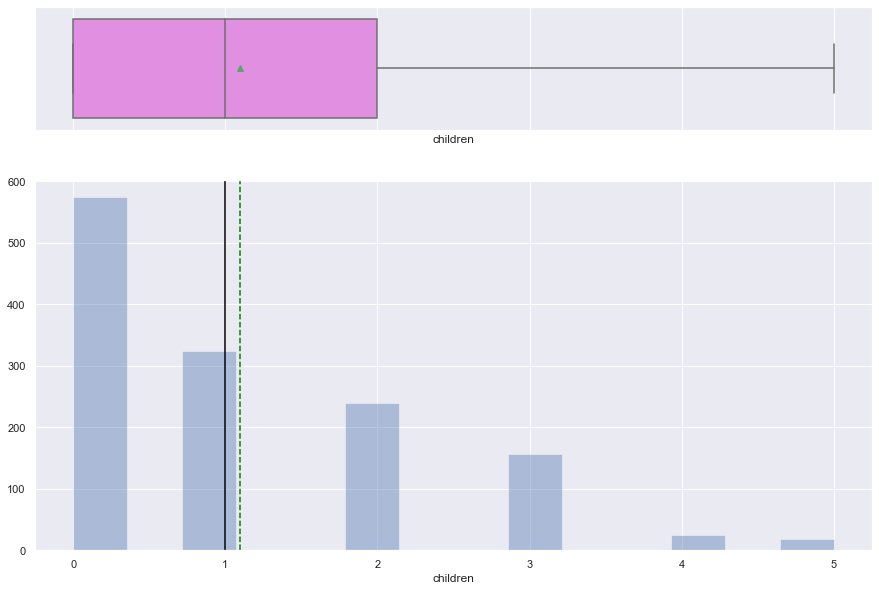

In [28]:
histogram_boxplot(axis['children'])

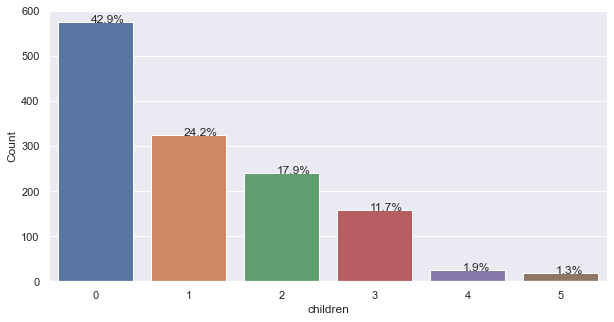

In [29]:
plt.figure(figsize=(10,5))
ax = sns.countplot(axis['children'])
plt.xlabel('children')
plt.ylabel('Count')
bar_perc(ax,axis['children']) 

OBSERVATIONS:

1. The data has a postive/right skewed distribution.
2. 43% of clients have no children.
3. Average number of children is approximately 1. 

## Observations on charges: 

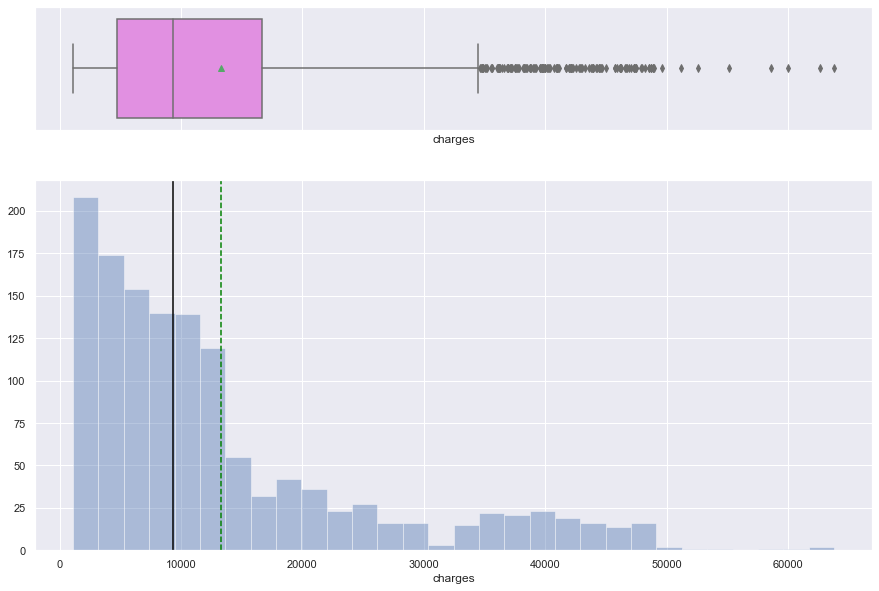

In [57]:
histogram_boxplot(axis['charges'])

OBSERVATIONS:

1. The data has a positive/right skewed distribution with outliers.
2. Will keep outliers because they contain valuable information relevent to this analysis.
3. The average charge per client appears to be around $13,000.

## Multivariate analysis 

## Numerical vs. numerical observations: 

### Correlation:

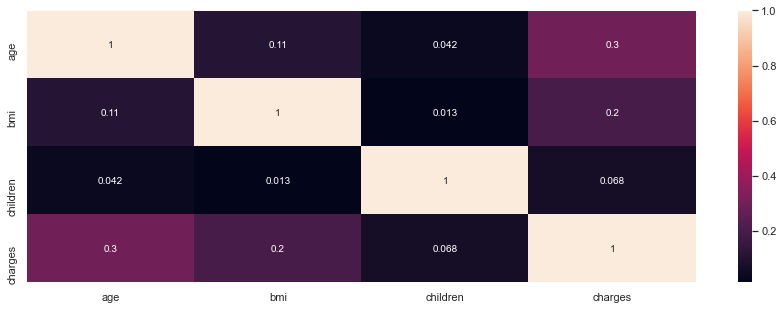

In [62]:
plt.figure(figsize=(15,5))
sns.heatmap(axis.corr(),annot=True)
plt.show()

OBSERVATIONS:

1. The greatest correlation exists between a client's age and charges (.3) and a client's BMI and charges (.2). This is not a strong correlation suggestion but should be explored further. 

NOTES:

1. Value closer to -1 or 1 means a strong correlation.
2. A value closer to zero means a weak correlation
3. Important to remember that "correlation does not imply causation"!!

## Numerical vs. numerical further analysis:

### Relationship between age and charges: 

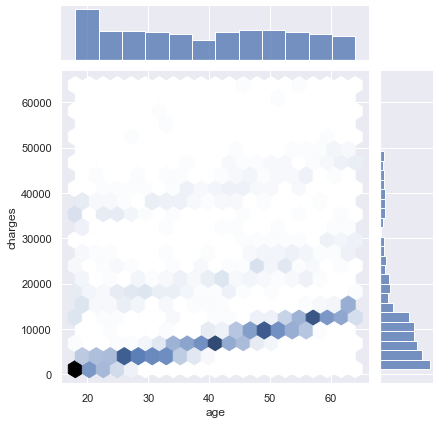

In [77]:
sns.jointplot(axis['age'], axis['charges'], kind = "hex")
plt.show()

OBSERVATIONS:

1. As the client ages, there is an increase in the dollar amount of charges.

### Relationship between bmi and charges:

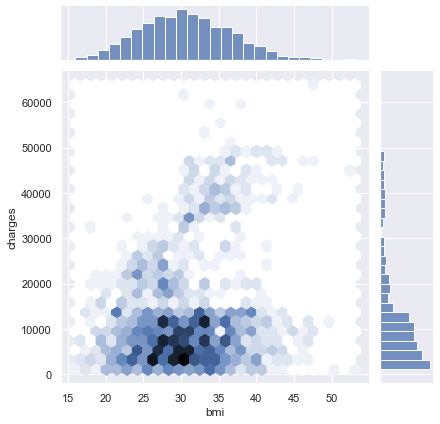

In [80]:
sns.jointplot(axis['bmi'], axis['charges'], kind = "hex")
plt.show()

OBSERVATIONS:

1. There does not seem to be a correlation between a client's BMI and their charges. 

## Categorical vs. numerical observations: 

### Relationship between sex and age:

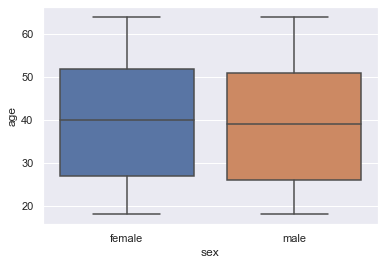

In [82]:
sns.boxplot(axis['sex'], axis['age']);

OBSERVATIONS:

1. Females appear to be only slightly older overall than males.

### Relationship between sex and BMI: 

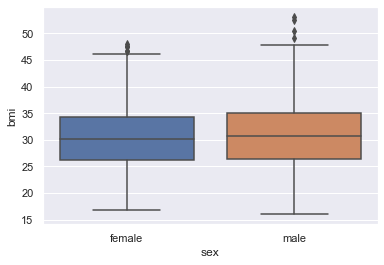

In [83]:
sns.boxplot(axis['sex'], axis['bmi']);

OBSERVATIONS:

1. Males have a slightly higher BMI and have some outliers on the higher end of the BMI scale

### Relationship between sex and children:

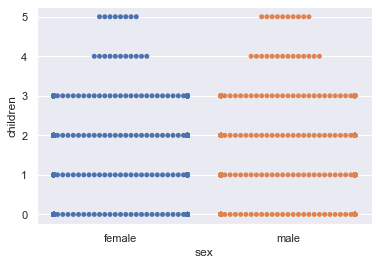

In [86]:
sns.swarmplot(axis['sex'], axis['children']);

OBSERVATIONS:

1. Not a distinct difference between the sex of the client and the number of children.
2. Deeper profiling and further analysis in future research to determine the marital status of the client. 

### Relationship between sex and charges: 

<AxesSubplot:xlabel='sex', ylabel='charges'>

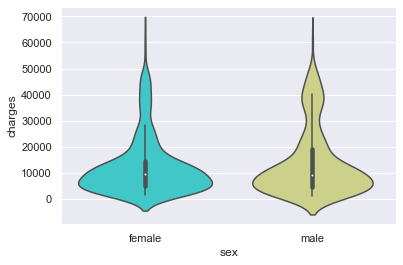

In [91]:
sns.violinplot(x="sex", y="charges", data=axis,palette='rainbow')

OBSERVATIONS:

1. The sex of the client with regard to their charges does not show a significant difference. 
2. Males show a slight larger proportion within the $40 to 50,000 charge area.  
3. Deeper profiling and further analysis in future research to determine if these charges include all covered under the policy or just the the main policy holder

### Relationship between smoker and age: 

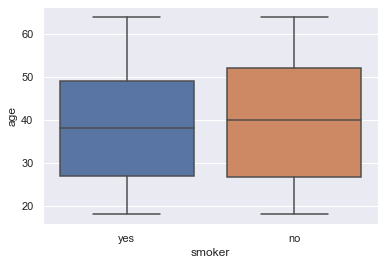

In [92]:
sns.boxplot(axis['smoker'], axis['age']);

OBSERVATIONS:

1. There are more nonsmokers dispersed between a larger age range. 

### Relationship between smoker and BMI: 

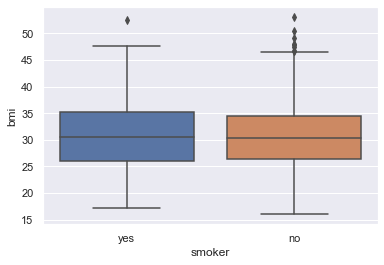

In [93]:
sns.boxplot(axis['smoker'], axis['bmi']);

OBSERVATIONS:

1. Smokers appear to have slightly higher BMI's than nonsmokers.
2. Nonsmokers have more outliers (they also are 79.5% of the clients surveyed). Further exploration of this in additional analysis. 

### Relationship between smoker and children: 

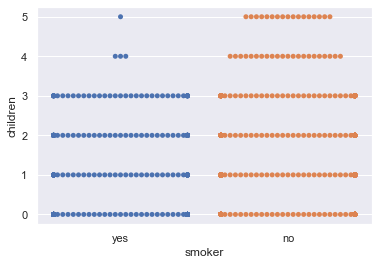

In [96]:
sns.swarmplot(axis['smoker'], axis['children']);

OBSERVATIONS:

1. More nonsmokers have children and more of them have 4 or 5 children comparitive to smokers.

### Relationship between smoker and charges: 

<AxesSubplot:xlabel='smoker', ylabel='charges'>

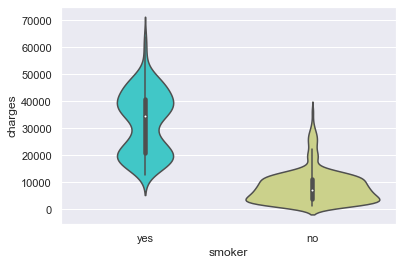

In [102]:
sns.violinplot(x="smoker", y="charges", data=axis,palette='rainbow')

OBSERVATIONS:

1. Nonsmokers have lower charges overall than smokers.
2. Further analysis could reveal more since nonsmokers have more children but lower charges per client.

### Relationship between region and age: 

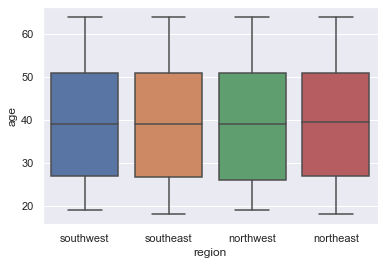

In [103]:
sns.boxplot(axis['region'], axis['age']);

OBSERVATIONS:

1. Not a significant difference between regions and age ranges.

### Relationship between region and BMI: 

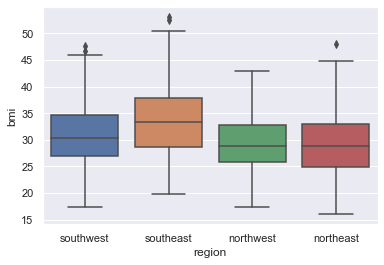

In [104]:
sns.boxplot(axis['region'], axis['bmi']);

OBSERVATIONS:

1. Southeast region shows a higher BMI trend with the southwest coming in slightly below. 
2. Northwest and northeast regions show lower BMI trends.
3. There are some outliers to be aware of.

### Relationship between region and children: 

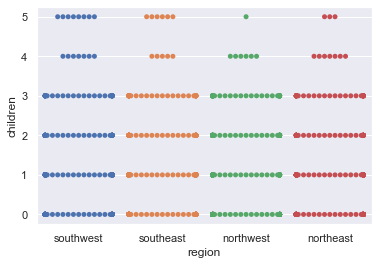

In [105]:
sns.swarmplot(axis['region'], axis['children']);

OBSERVATIONS:

1. The southwest and the southeast regions have more clients with 5 children. The northwest region has the fewest clients with 5 children.
2. Otherwise there is not a significant difference in distribution.

### Relationship between region and charges: 

<AxesSubplot:xlabel='region', ylabel='charges'>

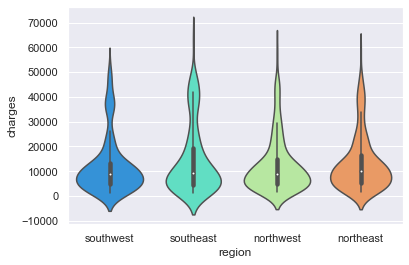

In [106]:
sns.violinplot(x="region", y="charges", data=axis,palette='rainbow')

OBSERVATIONS:

1. The southeast has the highest peak to their range.
2. The southwest has the shortest peak to their range. 

## Categorical vs. categorical vs. numerical observations: 

### Relationship between smokers, age and sex of clients: 

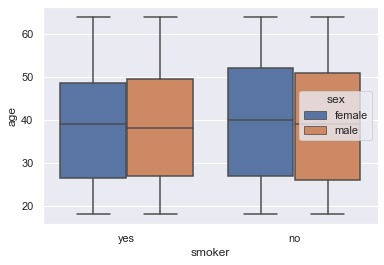

In [110]:
sns.boxplot(axis['smoker'], axis['age'], hue=axis['sex']);

OBSERVATIONS:

1. Nonsmokers who are female are slightly older than their male counterparts.
2. Smokers who are male are slightly older than their counterparts. 

### Relationship between smokers, BMI and sex of clients:  

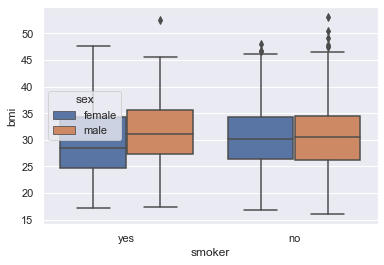

In [114]:
sns.boxplot(axis['smoker'], axis['bmi'], hue=axis['sex']);

OBSERVATIONS:

1. The majority of female smokers have a BMI between 25 and 34 while their male counterparts have a majority between 27 and 36.
2. The majority of nonsmokers have a BMI between 26 and 34. They both have the greater number of outliers. 

### Relationship between smokers, children and sex of clients: 

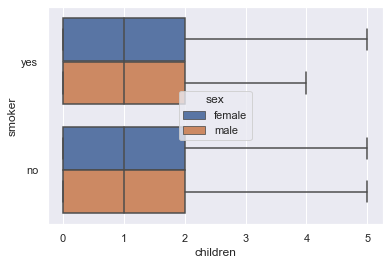

In [127]:
sns.boxplot(axis['children'], axis['smoker'], hue=axis['sex']);

OBSERVATIONS:

1. No significant relationship except to note that male smokers have 4 or fewer children.

### Relationship between smokers, charges and sex of clients:

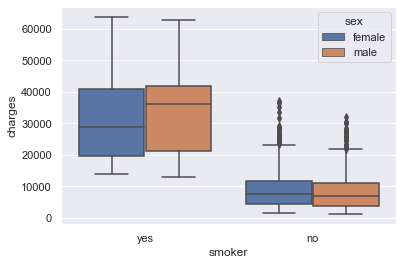

In [121]:
sns.boxplot(axis['smoker'], axis['charges'], hue=axis['sex']);

OBSERVATIONS:

1. Smokers have a significant higher range of charges when compared to nonsmokers.
2. Nonsmokers have more outliers specifically the female clients.

### Relationship between regions, age and sex: 

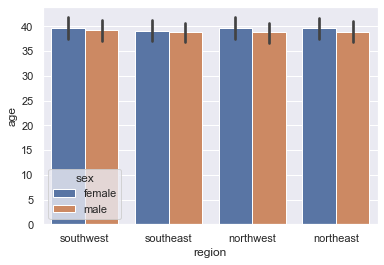

In [132]:
sns.barplot(axis['region'], axis['age'], hue=axis['sex']);

OBSERVATIONS:

1. There is no significant relationship between regions, age and sex of the clients.

### Relationship between regions, bmi and sex: 

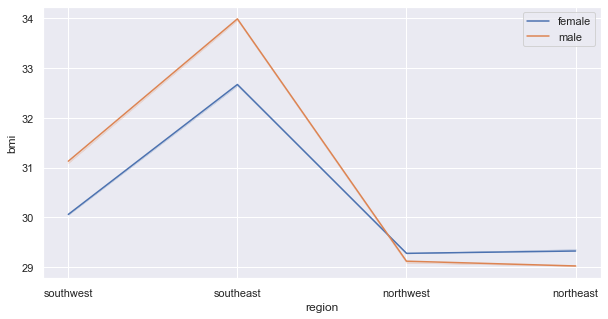

In [134]:
plt.figure(figsize=(10,5))
sns.lineplot(axis["region"],axis["bmi"],hue=axis["sex"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

OBSERVATIONS:

1. Males in the southest have the highest BMI while their counterparts in the northwest and northeast have the lowest BMI.
2. Females have the highest BMI in the southeast region.

### Relationship between regions, children and sex: 

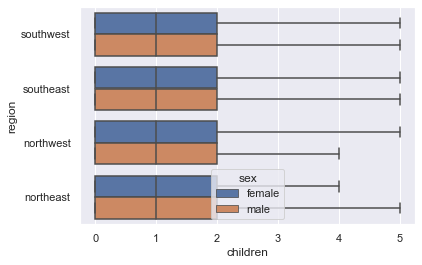

In [138]:
sns.boxplot(axis['children'], axis['region'], hue=axis['sex']);

OBSERVATIONS:

1. Males in the northwest and females in the northeast have 4 or fewer children.

### Relationship between regions, charges and sex: 

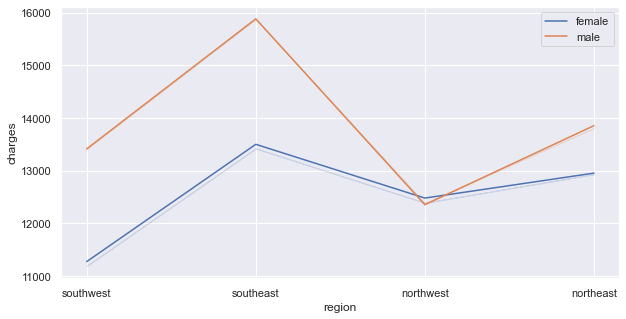

In [140]:
plt.figure(figsize=(10,5))
sns.lineplot(axis["region"],axis["charges"],hue=axis["sex"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

OBSERVATIONS:

1. Males in the southeast have the highest charges while their counterparts in the northwest have the lowest (of the males surveyed).
2. Females in the southeast have the highest charges while their counterparts in the southwest have the lowest (of the females surveyed).

# STATISTICAL ANALYSIS EXPLORATION 

In [118]:
axis_encoded = axis.copy(deep = True)

In [19]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
axis_encoded['smoker'] = number.fit_transform(axis_encoded['smoker']).astype(int)
axis_encoded['sex'] = number.fit_transform(axis_encoded['sex']).astype(int)
axis_encoded.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


LabelEncoder has taken 0 for female and 1 for male in the 'sex' column.
It has taken 1 for yes and 0 for no in the 'smoker' column.

##  Determine if there is a greater number of medical claims made by individuals who smoke as opposed to nonsmokers:

1. Null hypothesis (H0): Medical claims are equal between smokers and nonsmokers. 
2. Alternate hypothesis (HA): Claims are higher for smokers than nonsmokers.

In [119]:
axis.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


OBSERVATIONS:

1. Although there are almost 80% more nonsmokers than smokers, the mean of smoker's charges compared to nonsmokers is significantly higher. 

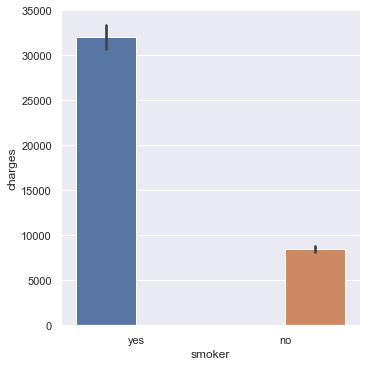

In [12]:
sns.catplot(x = 'smoker', y = 'charges', hue = 'smoker', data = axis, kind = 'bar', height = 5)

OBSERVATIONS:

1. Charges for medical claims are significantly higher for smokers than nonsmokers. 

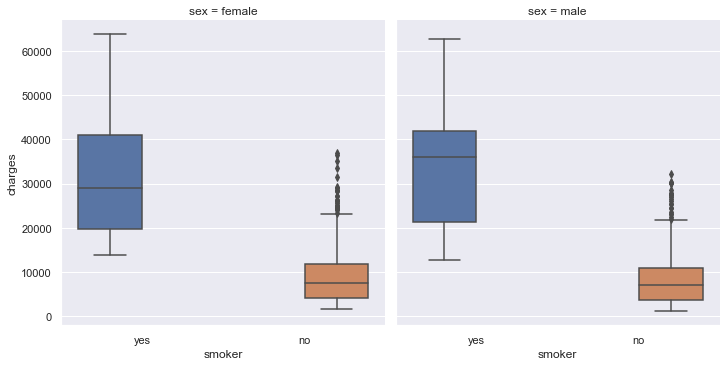

In [13]:
sns.catplot(x = 'smoker', y = 'charges', hue = 'smoker', col = 'sex', data = axis, kind = 'box', height = 5)

OBSERVATIONS:

1. Charges for medical claims for both female and male smokers is higher than that of nonsmokers.

### Statistical test: 

Using the T-test since our data is continuous (after endoding) and the standard deviation of the population is unknown. Specifically, the one sample T-test since this dataset represents one sample of the population.

In [31]:
t_stats, p_value = ttest_ind(axis_encoded['charges'] , axis_encoded['smoker'])
print('T-statistic: ', '%1.2f' % t_stats, '\n\nP value: ',  '%1.2f' % p_value)

print('\nResult of Statistical Test:')

if p_value > 0.05:
    print('Null Hypothesis (H0) accepted - Medical claims are equal between smokers and nonsmokers.')
else:
    print('Null Hypothesis (H0) rejected (Alternate Hypothesis(HA) accepted) - Claims are higher for smokers than nonsmokers.')

T-statistic:  40.08 

P value:  0.00

Result of Statistical Test:
Null Hypothesis (H0) rejected (Alternate Hypothesis(HA) accepted) - Claims are higher for smokers than nonsmokers.


OBSERVATIONS:

1. Our P value was 0.00 which is < 0.05, Therefore, we reject our null hypothesis and accept the alternate hypothesis that claims are higher for smokers than nonsmokers. 

##  Determine if there is a difference in the BMI of females versus males:

1. Null hypothesis (HO): BMI of females = BMI of males
2. Alternate hypothesis (HA): BMI of females is not equal to the BMI of males

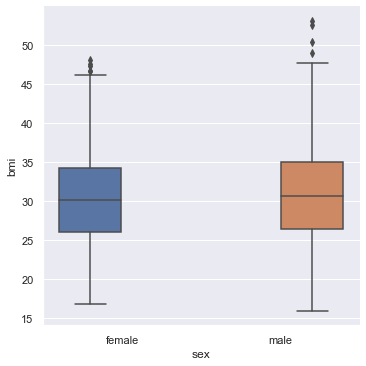

In [33]:
sns.catplot(x = 'sex', y = 'bmi', hue = 'sex', data = axis, kind = 'box', height = 5)

OBSERVATIONS:

1. Males have a slightly higher BMI and have some outliers on the higher end of the BMI scale.

### Statistical test: 

Using the T-test since our data is continuous (after endoding) and the standard deviation of the population is unknown. Specifically, the one sample T-test since this dataset represents one sample of the population.

In [35]:
t_stats, p_value = ttest_ind(axis_encoded['bmi'] , axis_encoded['sex'])
print('T-statistic: ', '%1.2f' % t_stats, '\n\nP value: ', '%1.2f' %  p_value)

print('\nResult of Statistical Test:')

if p_value > 0.05:
    print('Null Hypothesis (H0) accepted - BMI of females = BMI of males')
else:
    print('Null Hypothesis (H0) rejected (Alternate Hypothesis (H1) accepted) - BMI of females is not equal to the BMI of males.')

T-statistic:  180.29 

P value:  0.00

Result of Statistical Test:
Null Hypothesis (H0) rejected (Alternate Hypothesis (H1) accepted) - BMI of females is not equal to the BMI of males.


OBSERVATIONS:

1. Our P value was 0.00 which is < 0.05, Therefore, we reject our null hypothesis and accept the alternate hypothesis that the BMI of females is not equal to the BMI of males. 

## Determine if there is a difference in the proportions of smokers across different regions: 

1. Null hypothesis (HO): Proportion of smokers are equal across the four regions.
2. Alternate hypothesis (HA): Proportion of smokers are different across the four regions.

In [43]:
smoking_region = pd.crosstab(axis['smoker'],axis['region'])
smoking_region

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


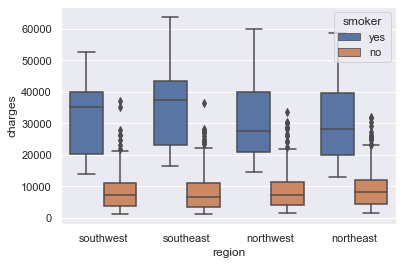

In [57]:
sns.boxplot(axis['region'], axis['charges'], hue=axis['smoker']);

OBSERVATIONS:

1. Greatest number of smokers within a region occurs in the southeast.
2. Significantly more nonsmokers than smokers across all regions. 
3. Proportion between regions with regard to smokers appears similiar. 

### Statistical test: 

Using the chi square contingency test since our data is categorical, and we have more than 2 samples to compare. This test will test for a relationship between two categorical variables. 

In [42]:
chi2_stats, p_value, dof, table = chi2_contingency(smoking_region)
print('Chi2 Statistics: ', '%1.2f' % chi2_stats)
print('\nDegrees of Freedom: ', '%1.2f' % dof)
print('\nP-Value: ', '%1.2f' % p_value)
print('\nContingency Table: \n', table)

print('\nResult of Statistical Test:')

if p_value > 0.05:
    print('Null Hypothesis (H0) accepted - Proportion of smokers are equal across the four regions.')
else:
    print('Null Hypothesis (H0) rejected (Alternate Hypothesis (HA) accepted) - Proportion of smokers are different across the four regions.')

Chi2 Statistics:  7.34

Degrees of Freedom:  3.00

P-Value:  0.06

Contingency Table: 
 [[257.65022422 258.44544096 289.45889387 258.44544096]
 [ 66.34977578  66.55455904  74.54110613  66.55455904]]

Result of Statistical Test:
Null Hypothesis (H0) accepted - Proportion of smokers are equal across the four regions.


OBSERVATIONS:

1. Our P value was 0.06 which is > 0.05, Therefore, we accept our null hypothesis that the proportion of smokers are equal across the four regions.  

## Determine if the mean BMI of women with no children, one child and two children are the same:

1. Null hypothesis (HO): The mean BMI of women with no children, one child and two children are the same.
2. Alternate hypothesis (HA): The mean BMI of women with no children, one child and two children are all different.

In [44]:
female = axis[axis.loc[:, 'sex'] == 'female'] 

In [102]:
female.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


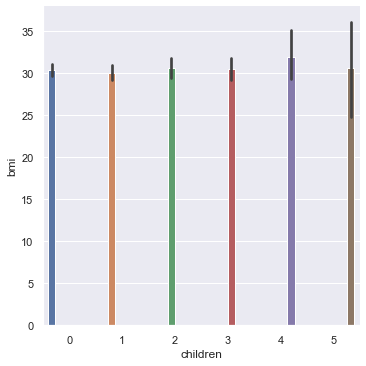

In [45]:
sns.catplot(x = 'children', y = 'bmi', data = female, hue = 'children', kind = 'bar', height = 5)

OBSERVATIONS:

1. The BMI of women with no children, one child and two children is fairly consistent.

### Statistical test: 

Using the ANOVA test since our data is continuous (after encoding), the population standard deviation is unknown and we have more than 2 groups. ANOVA uses F-tests to statistically test the equality of means of our 3 groups.

First, I will set up a data frame that will include only the BMI's from females with 0, 1, or 2 children. 

In [112]:
child_2=female.loc[(female["children"]<=2)]

In [113]:
child_2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510


In [114]:
child_2.tail()

,age,sex,bmi,children,smoker,region,charges
1331,23,female,33.40,0,no,southwest,10795.93733
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500
1337,61,female,29.07,0,yes,northwest,29141.36030


In [115]:
formula = 'bmi ~ C(children)'
model = ols(formula, child_2).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3345
Date:                Thu, 18 Mar 2021   Prob (F-statistic):              0.716
Time:                        13:59:42   Log-Likelihood:                -1821.7
No. Observations:                 566   AIC:                             3649.
Df Residuals:                     563   BIC:                             3662.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           30.3615      0.357  

In [116]:
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(children),2.0,24.590123,12.295062,0.334472,0.715858
Residual,563.0,20695.661583,36.759612,NaN,NaN


OBSERVATIONS:

1. P value is 0.715858 
2. This value is greater than our .05 level of significance. Therefore, we accept our null hypothesis that the mean BMI of women with no children, one child and two children are all the same.

# CONCLUSIONS:

After performing the exploratory data analysis as well as the statistical analysis, we have learned the following:

1. There is an almost equal split between male and female clients, close to 80% are nonsmokers, 43% of clients have no children (those with children have 1 on average) and the average age is 39 years old. The average BMI of clients is 31 which is considered beyond the healthy range. The average charges by clients is around 13,000 dollars.    
2. Males have a slightly higher BMI than the females surveyed and there are more male smokers than females. Nonsmoking females are older than their male counterparts. Female smoker's BMI fall within the range 25-34, male smokers fall within the range 27-36 and nonsmokers (both male and female) fall within the range 26-34 with some outliers. 
3. Nonsmokers have lower charges than smokers while having more kids and specifically have more instance of having 4 or 5 kids.
4. Southeast shows the highest BMI trend (for both males and females) and the highest charges. Southeast and southwest have more clients with 5 kids.

Statistical analysis:

1. We determined statistically there is a greater number of medical claims made by individuals who smoke as opposed to nonsmokers. This is despite the fact that there are almost 80% more nonsmokers than smokers and the mean of smoker's charges compared to nonsmokers is significantly higher.
2. We determined there is a difference in the BMI of females versus males and the data suggests that males have a higher BMI than females within this sample population. 
3. We determined there is not a significant difference in the proportions of smokers across the different regions. 
4. We determined the mean BMI of women with no children, one child and two children are all the same. 

# RECOMMENDATIONS:

Further data collection, exploration and analysis to include statistical analysis could lead to greater awareness in the following areas:

1. Profile clients to discern if they are single, married, or divorced. Specifically, learning of their spouses' smoking habits and BMI in addition to the client's. Although clients are single or divorced, knowing if they have children on the policy is also important when learning more about the charges for each client.
2. The average age of this sample was 39 years old so I would encourage further sampling to discern if this is standard for Axis Insurance clients (ie ads targeting a younger clientele). 
3. The charges portion of this sampling suggests further exploration of charges cross referencing client's profiles to gleen additional insights. Do older clients have higher charges? Are the charges listed for just the main policy holder or do they encompass all of those covered under the policy?
4. Focused study to determine a greater understanding of the target client profile to ensure advertising is hitting its target audience.
5. Further insights as well as long term studies to determine if Axis incentivised things such as an active lifestyle, lower BMI etc could it save them money over the life of the client and their families. Does covering preventative screenings lower cost because major illnesses are caught early on?